In [29]:
from dash import Dash, html, dcc, Input, Output  # pip install dash
import dash_bootstrap_components as dbc
import pandas as pd
import numpy as np

import altair as alt                        # pip install altair

import matplotlib.pyplot as plt             # pip install matplotlib
import mpld3                                # pip install mpld3

from bokeh.plotting import figure           # pip install Bokeh
from bokeh.resources import CDN
from bokeh.embed import file_html
from bokeh.models import ColumnDataSource

# bring data into app
casetas = pd.read_excel('Casetas TDR.xlsx')
tlvia = pd.read_excel('Compilado televía 2.xlsx')
# print(cars.columns)

tlcount = tlvia[['TAG', 'Importe']].groupby('TAG').count()
cascount = casetas[['TAG', 'Costo Caseta']].groupby('TAG').count()
tlsum = tlvia[['TAG', 'Importe']].groupby('TAG').sum()
cassum = casetas[['TAG', 'Costo Caseta']].groupby('TAG').sum()
diffcount =  pd.DataFrame(tlcount['Importe'] - cascount['Costo Caseta'])
diffsum = pd.DataFrame(tlsum['Importe'] - cassum['Costo Caseta'])
diffsum = diffsum[diffsum != 0]
diffcount = diffcount[diffcount != 0]
diff = pd.merge(diffcount, diffsum, left_index=True, right_index=True)
diff.rename(columns = {'0_x':'Dif. Casetas pagadas', '0_y':'Dif. Total pagado'}, inplace = True)
tlvia.set_index('TAG', inplace=True)
diff2 = pd.merge(diff, tlvia, left_index=True, right_index=True)
diff2 = diff2[['#Unidad', 'Dif. Casetas pagadas', 'Dif. Total pagado']].dropna()
diff2.drop_duplicates(inplace=True)
diff2['#Unidad'] = diff2['#Unidad'].astype(str)
diff2.set_index('#Unidad', inplace=True)

In [30]:
import plotly.express as px

# Set up Dash app
app = Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

# Funciones y cosas
ddown = dcc.Dropdown(id='mydropdown',
        value=['Dif. Total pagado'],
        options=[{'label': i, 'value': i} for i in ['Dif. Casetas pagadas', 'Dif. Total pagado']])

graph0 = dcc.Graph(id="Barras")  

# Set up the page layout
app.layout = html.Div([ddown, graph0])

@app.callback(
    Output('Barras', 'figure'),
    Input('mydropdown', 'value'))

def bar_chart(spending):
    fig = px.bar(
        diff2,
        x=diff2.index,
        y=spending,
        barmode="group",
        title="Diferencia en casetas por unidad",
    )
    return fig

#if __name__ == '__main__':
#    app.run_server(debug=False, port='8004')


In [31]:
# Define color palette
colors = {
    'color1': '#023059',
    'color2': '#023859',
    'color3': '#023859',
    'color4': '#F2AE30',
    'color5': '#0D0D0D',
    'color6': '#F2F2F2'}

In [32]:
# Set up Dash app
app = Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

graph1 = dcc.Graph(figure = px.pie(diff2, values='Dif. Total pagado', names=diff2.index, title='Distribucion de diferencias en total pagado en Televia vs contabilidad - Enero'))

# Set up the page layout
app.layout = html.Div([graph1]) 

#if __name__ == '__main__':
#    app.run_server(debug=True, port='8050')

In [33]:
# Datos diarios de pagos de casetas por unidad

tlvia1 = tlvia

# Primero simplifico el formato de fecha para que exista una version sin la hora especifica

tlvia1['Fecha'] = pd.to_datetime(tlvia1["Fecha"].dt.strftime('%Y-%m-%d'))

# Procedo a agrupar por unidad y fecha, para hacer una suma de pagos de casetas por dia

tlvia1[['#Unidad', 'Fecha', 'Importe']].groupby(['Fecha', '#Unidad']).sum()

Importe
Fecha      #Unidad         
2024-01-01 1715         250
           1721        1038
           1729         500
           1738        1245
           1746         660
...                     ...
2024-01-31 1816        1245
           1817        1641
           1819        1641
           1824         396
           1826        1245

[629 rows x 1 columns]

In [34]:
app = Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

ddown1 = dcc.Dropdown(
        id='unidad-dropdown',
        options=[{'label': i, 'value': i} for i in tlvia1['#Unidad'].unique()],
        value=tlvia1['#Unidad'].unique()[0])

graph2 = dcc.Graph(id='line-chart')

app.layout = html.Div([ddown1, graph2])

@app.callback(
    Output('line-chart', 'figure'),
    [Input('unidad-dropdown', 'value')]
)
def update_line_chart(unidad):
    df_filtered = tlvia1[tlvia1['#Unidad'] == unidad]
    fig = px.bar(df_filtered, x='Fecha', y='Importe', title='Pagos de casetas por día')
    return fig

#if __name__ == '__main__':
#    app.run_server(debug=True)

## Compilado no. 1

In [35]:
#Generamos variables para las tajetas de televia y casetas pagadas  (TDR)

#Contavilizamos el numero de filas del dataset tlvia
caspag = tlvia.Entrada.count()

#Sumamos el importe de las casetas pagadas (TDR)
casimpTDR = casetas['Costo Caseta'].sum()

#Sumamos el importe de las casetas pagadas (Televia)
casimpTV = tlvia['Importe'].sum()


In [41]:
import base64

# Set up Dash app
app = Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

test_png = 'logotdr.png'
test_base64 = base64.b64encode(open(test_png, 'rb').read()).decode('ascii')


tarjetas = dbc.Row([
        dbc.Col([
            dbc.Card([
                dbc.CardBody([
                    html.H4(" # Casetas Pagadas (Televia)", className="card-title"),
                    html.H2(f"{caspag}",
                            className="card-text"),
                ])
            ])
        ]),

        dbc.Col([
            dbc.Card([
                dbc.CardBody([
                    html.H4("Importe Caseta Pagadas (TDR)", className="card-title"),
                    html.H2(f"${casimpTDR:,.2f}",
                            className="card-text"),
                ])
            ])
        ]),
        dbc.Col([
            dbc.Card([
                dbc.CardBody([
                    html.H4("Importe Caseta Pagadas (Televia)", className="card-title"),
                    html.H2(f"${casimpTV:,.2f}",
                            className="card-text"),
                ])
            ])
        ])
    ])

# Set up the page layout
app.layout = html.Div([
    html.Div(
        style={
            'backgroundColor': colors['color2'],
            'padding': '5px',
            'textAlign': 'center'},
        children=[html.Img(src='data:image/png;base64,{}'.format(test_base64))
        ]
    ),
 
    dcc.Tabs(
        id='tabs',
        className= 'dbc',
        value='tab-1',
        style={'backgroundColor': colors['color6']},
        children=[
            dcc.Tab(
                label = 'Overview',
                value = 'tab-1',
                children = [
                    html.Br(),
                    dbc.Row([

                        tarjetas, 
                    ]),
                    dbc.Row([
                        dbc.Col([
                            ddown, 
                            graph0,
                        ]),
                        dbc.Col([ 
                            graph1
                        ])
                    ])
                ]
            ),
            dcc.Tab(
                label = 'Pagos por unidad',
                value = 'tab-2',
                children = [
                    html.Br(),
                    dbc.Row([
                        ddown1, 
                        graph2
                    ])
                ]
            )
        ]
    )
])



#Definimos la funcion para el grafico de barras
@app.callback(
    Output('Barras', 'figure'),
    Input('mydropdown', 'value'))

def bar_chart(spending):
    fig = px.bar(
        diff2,
        x=diff2.index,
        y=spending,
        barmode="group",
        title="Diferencia en casetas por unidad",
    )
    return fig

@app.callback(
    Output('line-chart', 'figure'),
    [Input('unidad-dropdown', 'value')])

def update_line_chart(unidad):
    df_filtered = tlvia1[tlvia1['#Unidad'] == unidad]
    fig = px.bar(df_filtered, x='Fecha', y='Importe', title='Pagos de casetas por día')
    return fig

if __name__ == '__main__':
    app.run_server(debug=False, port='8004')

Img(src='')
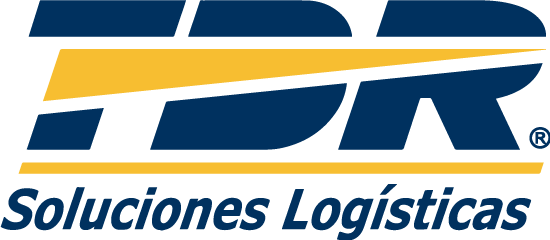